In [1]:
from collections import OrderedDict
import csv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# plot formatting

plt.rcParams['font.size'] = 10
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Linear Regression Estimation Approximation

## Part 5

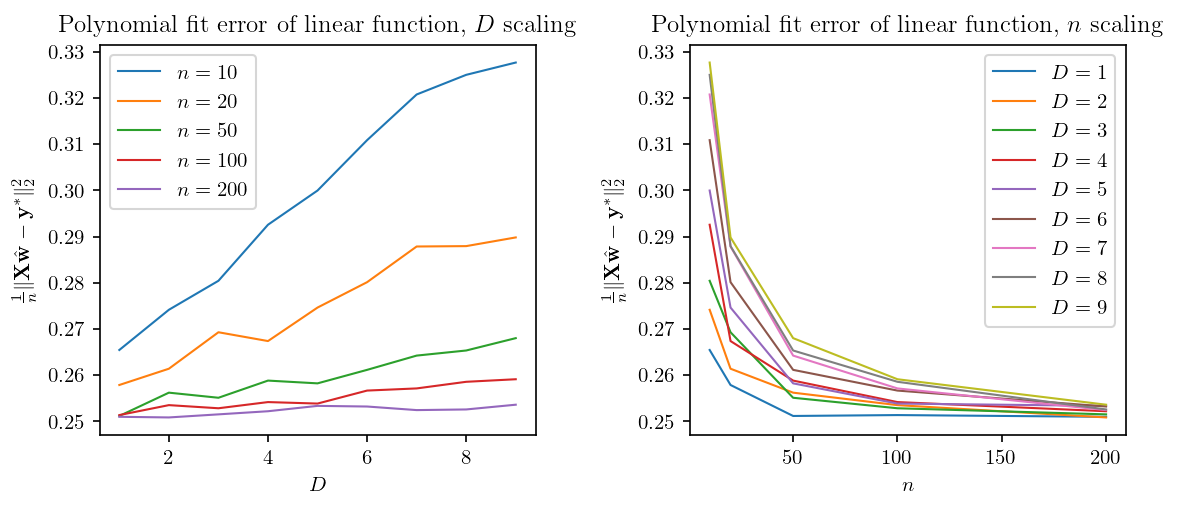

In [3]:
def simulate_part_4(D, n, w0=1, w1=1, sigma=1):
    alphas = np.random.rand(n) * (1 - (-1)) + (-1)
    y_star = w1*alphas + w0 
    y = y_star + sigma*np.random.rand(n)
    p = np.poly1d(np.polyfit(alphas, y, D))
    return ((p(alphas) - y_star)**2).mean()

n_trials = 1000

Ds = list(range(1, 10))
ns = [10, 20, 50, 100, 200]

mse = np.zeros((len(ns), len(Ds)))

for i, n in enumerate(ns):
    for j, D in enumerate(Ds):
        mse[i, j] = np.mean([simulate_part_4(D, n) for _ in range(n_trials)])

plt.figure(figsize=(8, 3.5))

plt.subplot(1, 2, 1)
for i, n in enumerate(ns):
    plt.plot(Ds, mse[i, :], label='$n=%d$' % n)

plt.title('Polynomial fit error of linear function, $D$ scaling')
plt.ylabel(r'$\frac{1}{n}\|\mathbf{X}\hat{\mathbf{w}} - \mathbf{y^*}\|_2^2$')
plt.xlabel('$D$')
plt.legend()

plt.subplot(1, 2, 2)
for j, D in enumerate(Ds):
    plt.plot(ns, mse[:, j], label='$D=%d$' % D)

plt.title('Polynomial fit error of linear function, $n$ scaling')
plt.ylabel(r'$\frac{1}{n}\|\mathbf{X}\hat{\mathbf{w}} - \mathbf{y^*}\|_2^2$')
plt.xlabel('$n$')
plt.legend()

plt.tight_layout()
plt.show()

## Part 7

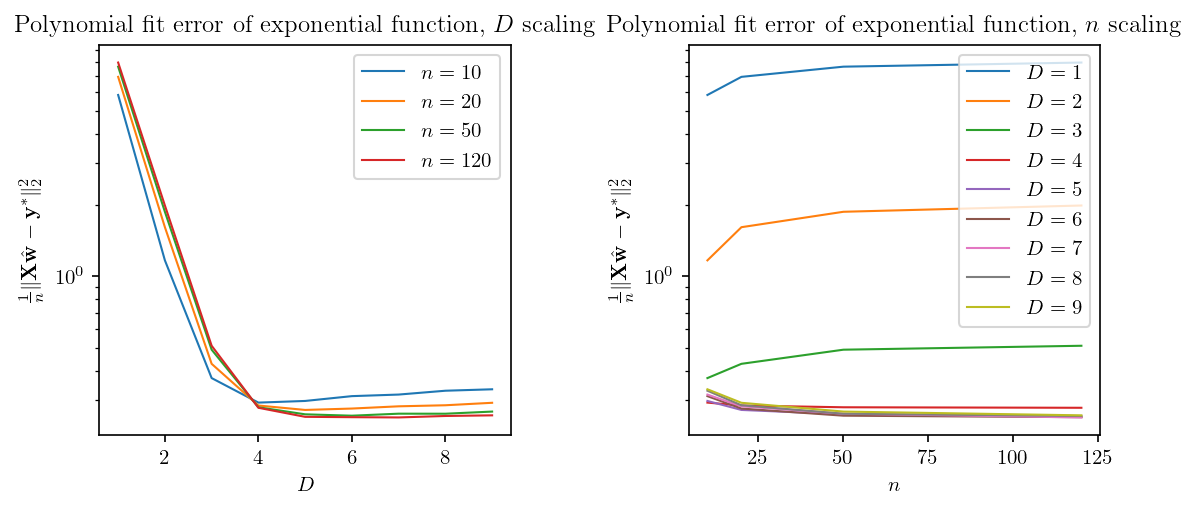

In [4]:
def simulate_part_6(D, n, sigma=1):
    alphas = np.random.rand(n) * (3 - (-4)) + (-4)
    y_star = np.exp(alphas) 
    y = y_star + sigma*np.random.rand(n)
    p = np.poly1d(np.polyfit(alphas, y, D))
    return ((p(alphas) - y_star)**2).mean()

n_trials = 1000

Ds = list(range(1, 10))
ns = [10, 20, 50, 120]

mse = np.zeros((len(ns), len(Ds)))

for i, n in enumerate(ns):
    for j, D in enumerate(Ds):
        mse[i, j] = np.mean([simulate_part_6(D, n) for _ in range(n_trials)])

plt.figure(figsize=(8, 3.5))

plt.subplot(1, 2, 1)
for i, n in enumerate(ns):
    plt.semilogy(Ds, mse[i, :], label='$n=%d$' % n)

plt.title('Polynomial fit error of exponential function, $D$ scaling')
plt.ylabel(r'$\frac{1}{n}\|\mathbf{X}\hat{\mathbf{w}} - \mathbf{y^*}\|_2^2$')
plt.xlabel('$D$')
plt.legend()

plt.subplot(1, 2, 2)
for j, D in enumerate(Ds):
    plt.semilogy(ns, mse[:, j], label='$D=%d$' % D)

plt.title('Polynomial fit error of exponential function, $n$ scaling')
plt.ylabel(r'$\frac{1}{n}\|\mathbf{X}\hat{\mathbf{w}} - \mathbf{y^*}\|_2^2$')
plt.xlabel('$n$')
plt.legend()

plt.tight_layout()
plt.show()